In [ ]:
!pip install seaborn biopython squiggle

In [2]:
#task to perform:
# 1. Protein Analysis
# 2. Comparing Human Coronavirus RNA with CV229E, CVHKU1, CVNL63 and CVNL63

In [1]:
#pip install seaborn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

In [2]:
"""
Some facts regarding the virus itself: COVID-19

It is of the (+)ssRNA classification of viruses, which means it is a single stranded virus that can be directly translated into protein.
The actual virus is called CVNL63-CoV-2, Covid-19 is the name for the respiratory disease it causes (I found this interesting)
"""

'\nSome facts regarding the virus itself: COVID-19\n\nIt is of the (+)ssRNA classification of viruses, which means it is a single stranded virus that can be directly translated into protein.\nThe actual virus is called CVNL63-CoV-2, Covid-19 is the name for the respiratory disease it causes (I found this interesting)\n'

In [4]:
#pip install biopython
from Bio import SeqIO
for sequence in SeqIO.parse('MN908947.fna', "fasta"):
#     print(sequence.id)
#     print(sequence.seq)
    print(len(sequence),'nucliotides')

29903 nucliotides


In [5]:
# Loading Complementary DNA Sequence into an alignable file
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
DNAsequence = SeqIO.read('MN908947.fna', "fasta")

DNA = DNAsequence.seq

In [6]:
#Convert DNA into mRNA Sequence 
mRNA = DNA.transcribe() #Transcribe a DNA sequence into RNA.
# print(mRNA)
print('Length of mRNA', len(mRNA))

Length of mRNA 29903


In [7]:
"""
The difference between the complementary DNA and the mRNA is just that the bases T (for Thymine) is replaced with U (for Uracil).
"""
# Obtain Amino Acid Sequence from mRNA
Amino_Acid = mRNA.translate(table=1, cds=False)
# print('Amino Acid : ', Amino_Acid)
print("Length of Protein : ",len(Amino_Acid))
print("Length of Original mRNA : ",len(mRNA))

Length of Protein :  9967
Length of Original mRNA :  29903


D:\Programs\miniconda3\lib\site-packages\Bio\Seq.py:2334: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [8]:
"""
Codons
Cells decode mRNAs by reading their nucleotides in groups of three, called codons. Here are some features of codons:
Most codons specify an amino acid
Three "stop" codons mark the end of a protein
One "start" codon, AUG, marks the beginning of a protein and also encodes the amino acid methionine
"""
from Bio.Data import CodonTable
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [9]:
#Identify all the Proteins (chains of amino acids)
Proteins = Amino_Acid.split('*') # * is translated stop codon
df = pd.DataFrame(Proteins)
df.describe()
print('Total proteins:', len(df))
def conv(item):
    return len(item)
def to_str(item):
    return str(item)
df['sequence_str'] = df[0].apply(to_str)
df['length'] = df[0].apply(conv)
df.rename(columns={0: "sequence"}, inplace=True)
df.head()# Take only longer than 20
functional_proteins = df.loc[df['length'] >= 20]
print('Total functional proteins:', len(functional_proteins))
functional_proteins.describe()

Total proteins: 775
Total functional proteins: 80


,length
count,80.000000
mean,67.262500
std,299.955767
min,20.000000
25%,22.000000
50%,25.000000
75%,36.000000
max,2701.000000


In [10]:
"""
Let's now identify all the polypeptides so basically separating at the stop codon, marked by * . Then let's remove any sequence less than 20 amino acids long, as this is the smallest known functional protein (if curious). Note: In humans the smallest known functional protien is 44 amino acids long.
"""
#Identify all the Proteins (chains of amino acids)
Proteins = Amino_Acid.split('*') # * is translated stop codon
for i in Proteins[:]:
    if len(i) < 20:
        Proteins.remove(i)

# 1. Protein Analysis With The Protparam Module In Biopython
from __future__ import division
poi_list = []
MW_list = []
from Bio.SeqUtils import ProtParam
for record in Proteins[:]: 
#     print("\n")
    X = ProtParam.ProteinAnalysis(str(record))
    POI = X.count_amino_acids()
    poi_list.append(POI)
    MW = X.molecular_weight()
    MW_list.append(MW)
#     print("Protein of Interest = ", POI) 
#     print("Amino acids percent = ", str(X.get_amino_acids_percent())) 
#     print("Molecular weight = ", MW)
#     print("Aromaticity = ", X.aromaticity()) 
#     print("Flexibility = ", X.flexibility()) 
#     print("Isoelectric point = ", X.isoelectric_point()) 
#     print("Secondary structure fraction = ", X.secondary_structure_fraction())

<BarContainer object of 20 artists>

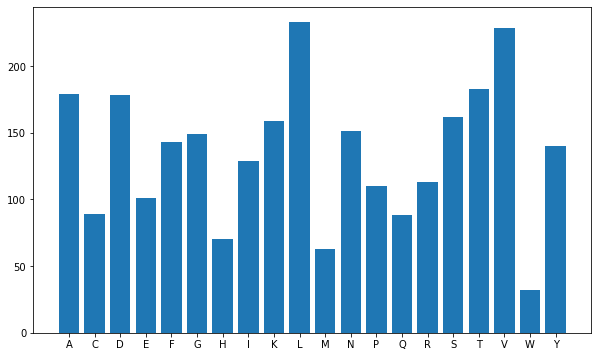

In [11]:
MoW = pd.DataFrame(data = MW_list,columns = ["Molecular Weights"] )
MoW.head()

#plot POI
poi_list = poi_list[48]
plt.figure(figsize=(10,6));
plt.bar(poi_list.keys(), list(poi_list.values()), align='center')

Text(0.5, 1.0, 'Length of proteins -- histogram')

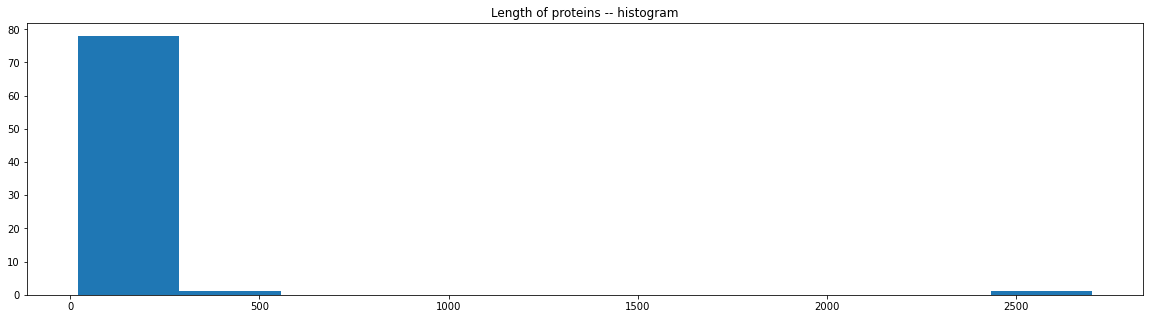

In [12]:
# Plot lengths
plt.figure(figsize=(20,5))
plt.subplot(111)
plt.hist(functional_proteins['length'])
plt.title('Length of proteins -- histogram')

Text(0.5, 1.0, 'Lenght of proteins (where < 60)')

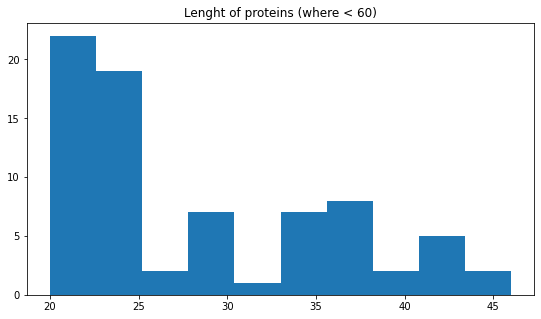

In [13]:
# Remove the extremes
plt.figure(figsize=(20,5))
wo = functional_proteins.loc[functional_proteins['length'] < 60]
plt.subplot(121)
plt.hist(wo['length'])
plt.title('Lenght of proteins (where < 60)')

Text(0.5, 1.0, 'Length of proteins (where > 1000)')

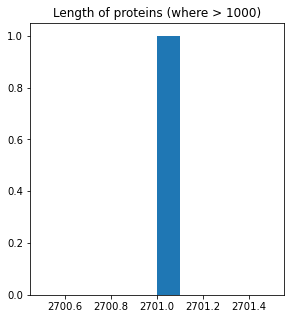

In [14]:
wo = functional_proteins.loc[functional_proteins['length'] > 1000]
plt.figure(figsize=(10,5))
plt.subplot(122)
plt.hist(wo['length'])
plt.title('Length of proteins (where > 1000)')

In [15]:
# See what's about that huge protein
large_prot = functional_proteins.loc[functional_proteins['length'] > 2700]
l = large_prot['sequence'].tolist()[0]
print('Sequence sample:', '...',l[1000:1150],'...')

Sequence sample: ... CKSHKPPISFPLCANGQVFGLYKNTCVGSDNVTDFNAIATCDWTNAGDYILANTCTERLKLFAAETLKATEETFKLSYGIATVREVLSDRELHLSWEVGKPRPPLNRNYVFTGYRVTKNSKVQIGEYTFEKGDYGDAVVYRGTTTYKLNV ...


In [16]:
#2. Comparing Human Coronavirus RNA

from Bio import pairwise2
# Define sequences to be aligned
COV2 = SeqIO.read("cov2.fasta", "fasta")
CVNL63 = SeqIO.read("cvNL63.fasta", "fasta")
CV229E = SeqIO.read("cv229E.fasta", "fasta")
CVHKU1 = SeqIO.read("cvHKU1.fasta", 'fasta')

In [17]:
print('Sequence Lengths:')
print('CVNL63:', len(CVNL63.seq))
print('COV2:', len(COV2.seq))
print('CV229E:', len(CV229E.seq))
print('CVHKU1:', len(CVHKU1.seq))

Sequence Lengths:
CVNL63: 27553
COV2: 29903
CV229E: 27317
CVHKU1: 29926


In [18]:
#Visualize DNA sequence using Squiggle #run in terminal
# !Squiggle cov2.fasta CVNL63.fasta CV229E.fasta --method=gates --separate

## COV2
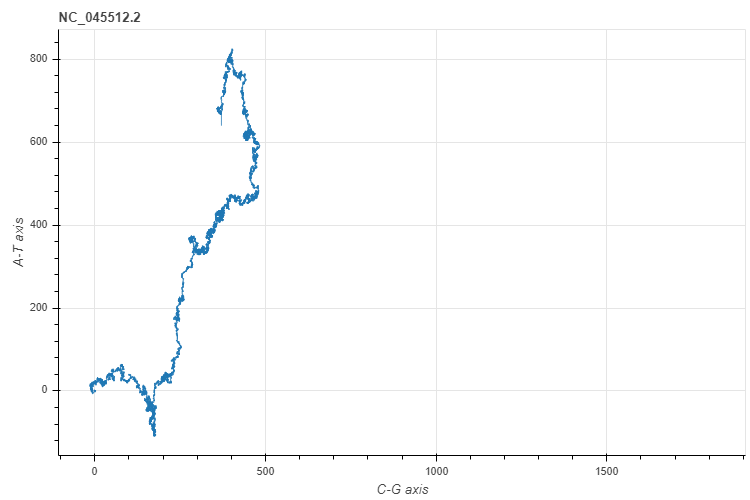
## CV NL63
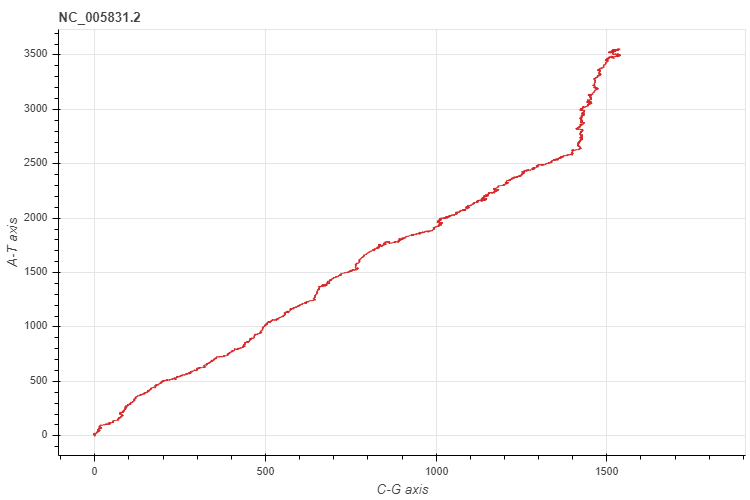
## CV HKU1
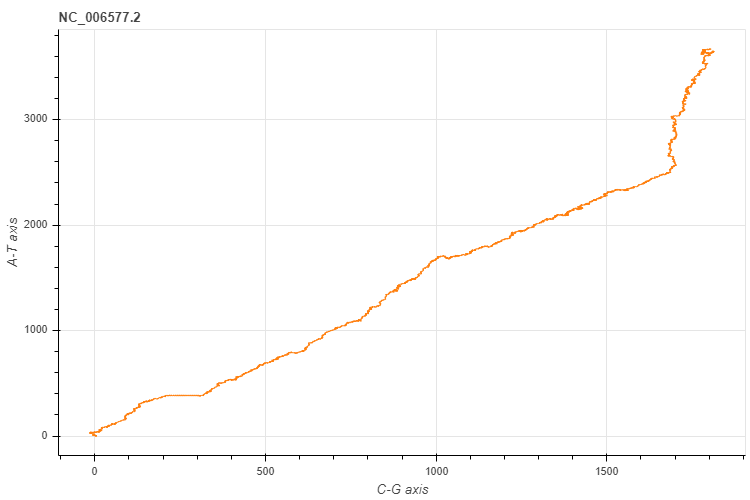
## CV 229E
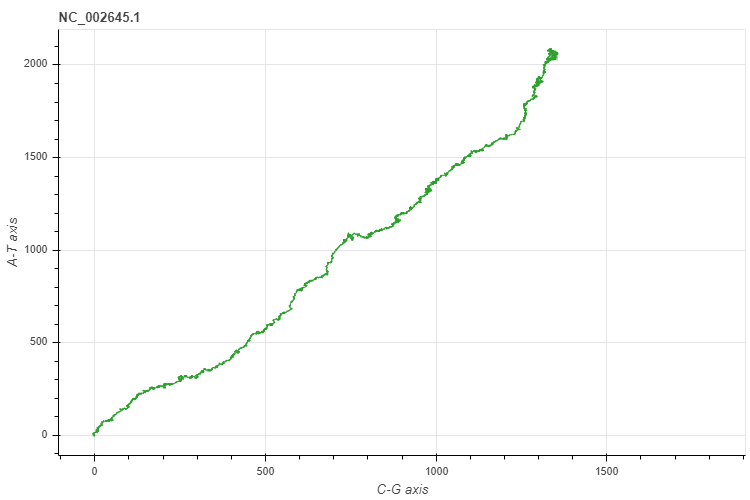


In [19]:
# Alignments using pairwise2 alghoritm
CVNL63_COV = pairwise2.align.globalxx(CVNL63.seq, COV2.seq, one_alignment_only=True, score_only=True)
print('CVNL63/COV Similarity (%):', CVNL63_COV / len(CVNL63.seq) * 100)
CV229E_COV = pairwise2.align.globalxx(CV229E.seq, COV2.seq, one_alignment_only=True, score_only=True)
print('CV229E/COV Similarity (%):', CV229E_COV / len(CV229E.seq) * 100)
CV229E_CVNL63 = pairwise2.align.globalxx(CV229E.seq, CVNL63.seq, one_alignment_only=True, score_only=True)
print('CV229E/CVNL63 Similarity (%):', CV229E_CVNL63 / len(CVNL63.seq) * 100)
CVNL63_CVHKU1 = pairwise2.align.globalxx(CVNL63.seq, CVHKU1.seq, one_alignment_only=True, score_only=True)
print('CVNL63/CVHKU1 Similarity (%):', CVNL63_CVHKU1 / len(CVNL63.seq) * 100)
CV229E_CVHKU1 = pairwise2.align.globalxx(CV229E.seq, CVHKU1.seq, one_alignment_only=True, score_only=True)
print('CV229E/CVHKU1 Similarity (%):', CV229E_CVHKU1 / len(CV229E.seq) * 100)

CVNL63/COV Similarity (%): 71.43323775995356
CV229E/COV Similarity (%): 71.6806384302815
CV229E/CVNL63 Similarity (%): 74.92106122745254
CVNL63/CVHKU1 Similarity (%): 72.87046782564512
CV229E/CVHKU1 Similarity (%): 71.88929970348134


<BarContainer object of 5 artists>

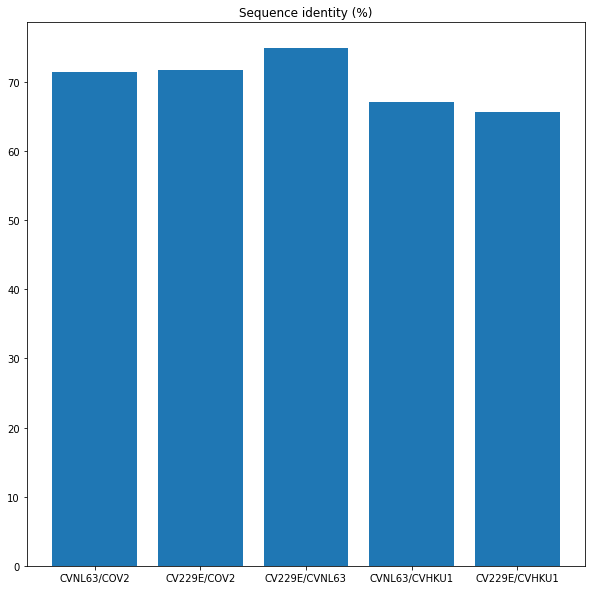

In [20]:
# Plot the data
plt.figure(figsize=(10, 10))
X = ['CVNL63/COV2', 'CV229E/COV2', 'CV229E/CVNL63', 'CVNL63/CVHKU1', 'CV229E/CVHKU1']
Y = [CVNL63_COV/ len(CVNL63.seq) * 100, CV229E_COV/ len(CV229E.seq)*100, CV229E_CVNL63/len(CVNL63.seq)*100, CVNL63_CVHKU1*100/len(CVHKU1.seq), CV229E_CVHKU1*100/len(CVHKU1.seq)]
plt.title('Sequence identity (%)')
plt.bar(X,Y)